# Analysis of *Cis* Regulatory Elements (CREs) in Promoter Sequences

In [ ]:
"""PMS.py: A Promoter Motive Search algorithm for indexing a text."""

__author__ = "Jose V. Die"

This notebook :
   
* counts the **occurrences of CREs** in a promoter dataset  
* estimates the **number of promoters expected to contain at least 1 CRE**, based on MonteCarlo simulations.  
* estimates the **P-value for the outcome** in the dataset, based on MonteCarlo simulations.  

&nbsp;

In [ ]:
import os
os.getcwd()

'/drive/notebooks'

&nbsp;

## Functions.
Define a series of functions needed for the analysis.

In [ ]:
def readGenome(filename):
    '''Read and store the nucleotide seqs from a multi-fasta file'''
    genome = []
    seqs=''
    with open(filename, 'r') as f:
        # Ignore header line with genome information
        for line in f:
            if line[0] == '>':
                genome.append(seqs)
                seqs = ''
            if not line[0] == '>' :
                    seqs += line.rstrip()
        genome.append(seqs) # Add last sequence
        del genome[0]       # Delete first empty sequence

    return genome

In [ ]:
def nameGenome(filename):
    '''Read and return the headers of each sequence in a multi-fasta file'''
    headers = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('>'):
                headers.append(line.strip()[1:])
    return headers

In [ ]:
%matplotlib inline
import pylab

def plotGC(genome) :
         ejex=[]
         ejey=[]
         contenido = 0
         for i in range(len(genome)) :
             ejex.append(i+1)
             contenido +=gc_fraction(genome[i])*100
             mean = contenido/(i+1)
             ejey.append(mean)
         pylab.plot(ejex,ejey)
         pylab.axis([0,35,20,30]) #Axes dimension frame
         pylab.title("%i Chickpea \n MADSbox Promoters\nGC%% %0.1f to %0.1f" \
                    % (len(ejey),min(ejey),max(ejey)))
         pylab.xlabel("Number of promoters")
         pylab.ylabel("Content GC%")

In [ ]:
import collections

def countBases(sequence):
    '''Count total number of each base in a given sequence
    sequence must be a list of sequences'''
    count = collections.Counter()
    for seq in sequence:
        count.update(seq)
    return(count)

In [ ]:
def naive(p,t): #Pattern, text
    occurrences = []
    for i in range(len(t) - len(p) + 1): #Every position in t where t can start w/o pass the end of t
        match = True
        for j in range(len(p)):        # Loop over characters
            if not t[i+j] == p[j]:     # Compare characters
                match = False
                break #No sense comparing the rest of p because we find a mistmach
        if match:
            occurrences.append(i)
    return occurrences


def search(CRE, dataset) :
    """Return list containing sequence and ocurrence of a CRE within a dataset"""
    's, sequence names containing CRE'
    'occurrences, position in the sequence'
    'genome, dataset'

    s = []
    occurrences = []
    for seqs in range(len(dataset)) :
        for motif in CRE :
            if len(naive(motif, dataset[seqs])) >0 : # If the motif is found :
                s.append(seqs)
                occurrences.append(naive(motif, dataset[seqs]))

    return s,occurrences


------

## Load the multi-fasta file

In [ ]:
file_promoters = 'dat/mads_promoters.fasta'
genome = readGenome(file_promoters)

            
    *  Number/Name of sequences :

In [ ]:
len(genome)

34

In [ ]:
seq_names = nameGenome(file_promoters)
seq_names[1:5]

['LOC101493118_promoter',
 'LOC101510419_promoter',
 'LOC101504656_promoter',
 'LOC101503022_promoter']

In [ ]:
import os
os.listdir("dat/")

['CREs.py', 'mads_promoters.fasta']

The file `CREs.py` contains all the CREs to be examined. This list can constantly be updated with new CREs.

In [ ]:
os.chdir('dat')
import CREs

In [ ]:
CRE = CREs.MYCATERD22 #This must always be a list; does not work with a string

In [ ]:
CRE

['CACATG']

**Sequence-coordinate combination of the motif in the sequence:** (It is not the sequence name but the position that the sequence has in the file + coordinate)

In [ ]:
a,b = search(CRE,genome)

Promoter Sequence with the CRE - position in the multi-fasta file :

In [ ]:
a

[6, 7, 11, 16, 17, 19, 31]

Promoter Sequence with the CRE - motive coordinate in the sequence :

In [ ]:
b

[[56], [869], [423, 1290], [1478], [909], [1290], [1059]]

In [ ]:
for i in range(len(a)) :
               print(a[i],b[i]) #Position of the sequence in file and coordinates of the motif in this sequence

6 [56]
7 [869]
11 [423, 1290]
16 [1478]
17 [909]
19 [1290]
31 [1059]


Name of the promoter sequence with the CRE :

In [ ]:
for n in a :
    print(seq_names[n])

LOC101503680_promoter
LOC101504006_promoter
LOC101510444_promoter
LOC101506754_promoter
LOC101501925_promoter
LOC101514275_promoter
LOC101490010_promoter


The same promoter may have various motives. To know exactly the
number of different promoters in the motives :

In [ ]:
len(set(a))

7

To know the promoter names (without repetitions) containing the motives:

In [ ]:
for n in list(set(a)) :
    print(seq_names[n])

LOC101503680_promoter
LOC101504006_promoter
LOC101510444_promoter
LOC101506754_promoter
LOC101501925_promoter
LOC101514275_promoter
LOC101490010_promoter


Right now, the file `CRE.py` contains *n* CRE :

In [ ]:
len(CREs.all)

43

**Now we repeat the same programmatically (number of sequences with CRE in file / number of occurrences CRE)**

In [ ]:
for t in CREs.all :
    CRE = t
    a,b = search(CRE,genome)
    occurr = 0
    for m in b:
        occurr +=len(m)
    print(len(set(a)),occurr)

27 48
2 2
4 4
9 17
2 2
0 0
2 2
24 39
1 1
24 47
32 96
9 11
29 72
34 414
34 374
26 53
33 263
34 149
34 240
34 226
33 186
32 106
34 337
4 4
22 36
21 30
4 4
27 48
6 6
9 12
0 0
3 3
6 6
1 1
8 9
8 8
11 13
2 2
0 0
9 10
7 8
32 82
0 0


# Estimating the number of promoters expected to contain at least 1 CRE



1.   Estimate the %GC content of the data set
2.   Build a promoter using that GC content
3. Estimate number of sequences expected to contain at least 1 CRE

        *   atLeastOneMotif
        *   runSim


&nbsp;

### 1. Estimate the average of GC content for my data set :

In [ ]:
from Bio.SeqUtils import gc_fraction

gc=[]
for seq in genome:
    gc.append(gc_fraction(seq))
total = sum(gc)/len(gc)*100
print('GC content :', round(total, 2), '%', sep = '')

GC content :26.02%


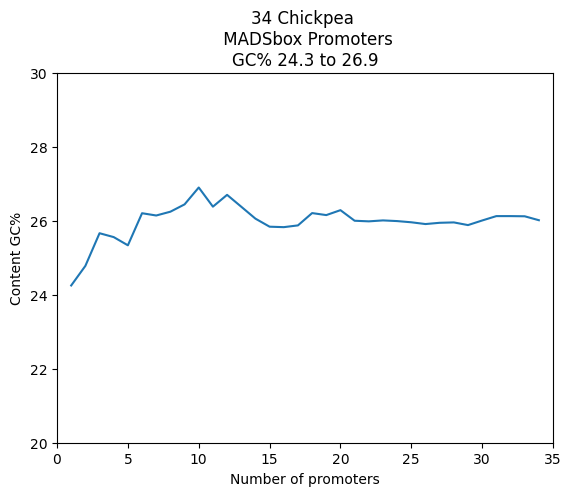

In [ ]:
plotGC(genome)
pylab.show()

In [ ]:
countBases(genome)

Counter({'T': 18742, 'A': 19044, 'G': 6441, 'C': 6854, 'N': 225})

In [ ]:
totalBases = countBases(genome)['G'] + countBases(genome)['C'] + countBases(genome)['A'] + \
    countBases(genome)['T'] + countBases(genome)['N']

contA = countBases(genome)['A']/float(totalBases)*100
contT = countBases(genome)['T']/float(totalBases)*100
contG = countBases(genome)['G']/float(totalBases)*100
contC = countBases(genome)['C']/float(totalBases)*100
contN = countBases(genome)['N']/float(totalBases)*100

print('GC content:',contG+contC,'%')
print('')
print('A content:',round(contA,1),'%')
print('T content:',round(contT,1),'%')
print('G content:',round(contG,1),'%')
print('C content:',round(contC,1),'%')
print('N content:',round(contN,1),'%')

GC content: 25.913148559622655 %

A content: 37.1 %
T content: 36.5 %
G content: 12.6 %
C content: 13.4 %
N content: 0.4 %


If the sequences contain "N", the total % Bases is not 100%.
To weigh these 'N' they can be attributed with the proportion of every single found base.

In [ ]:
print('A content:',round((countBases(genome)['A'] + contN * contA/100)/float(totalBases)*100,1),'%')
print('T content:',round((countBases(genome)['T'] + contN * contA/100)/float(totalBases)*100,1),'%')
print('G content:',round((countBases(genome)['G'] + contN * contA/100)/float(totalBases)*100,1),'%')
print('C content:',round((countBases(genome)['C'] + contN * contA/100)/float(totalBases)*100,1),'%')
print('')
print('GC content:',(countBases(genome)['G'] + contN * contA/100)/float(totalBases)*100 +\
(countBases(genome)['C'] + contN * contA/100)/float(totalBases)*100,'%')

A content: 37.1 %
T content: 36.5 %
G content: 12.6 %
C content: 13.4 %

GC content: 25.913783110159876 %


&nbsp;

### 2.   Build a synthetic promoter dataset using that GC content

In [ ]:
from random import choice

def weightedchoice(items):
    return choice("".join(x * y for x, y in items))

def getPromoter(length):
       '''Generates promoter with weighted bases'''
       DNA = ""
       for count in range(length):

            #Here we need to introduce the base frequence
            DNA+=weightedchoice([('C',13),('G',13),('A',37),('T',37)])

       return DNA

&nbsp;

### 3. Estimate number of sequences expected to contain at least 1 CRE

In [ ]:
def atLeastOneMotif(CRE, bp, nset):
    '''
    Return %promoters in a given data set containing at least 1 CRE

    CRE, cis-regulatory element
    bp, promoter length (1500)
    nset, number of actual promoters (65)
    '''
    numSuccess = 0 #Number of seqs with at least 1 motif

    for p in range(nset) :
        promotor = getPromoter(bp)
        numMotives = 0

        for m in CRE :
            if m in promotor :
                numMotives +=1

                if numMotives >0:
                    numSuccess +=1
                    break


    fracSuccess = numSuccess/float(nset)

    return fracSuccess

In [ ]:
CREs.DRE

['GCCGAC', 'ACCGAC']

In [ ]:
import random
CRE = CREs.DRE
nset = len(genome)
random.seed(26)
model1 = atLeastOneMotif(CRE,1500,nset)*nset
a,b = search(CRE,genome)
true = len(a)
print("Summary : \n Number of actual promoters in the dataset showing the CRE : {} promoters".format(true))
print(" Theoretically, the number of promoters showing at least 1 CRE : {} promoters".format(model1))

Summary : 
 Number of actual promoters in the dataset showing the CRE : 4 promoters
 Theoretically, the number of promoters showing at least 1 CRE : 2.0 promoters


&nbsp;

More accurate : Instead of generating `nset` sequences randomly and count in how many of them at least 1 CRE appears, we perform 2000 simulations of `nset` promoters each and save the number in each simulation.

In [ ]:
def runSim(CRE,bp,nset,numTrials) :
    '''
    Run a MC simulation (numTrials).
    Return a vector list with the number of expected promotores
    in a given data set (nset) containing at least 1 CRE in each
    trial (numTrials)

    CRE, cis-regulatory element
    bp, promoter length (1500)
    nset, number promoters in the data set
    numTrials, number of simulations
    '''

    vals= []
    total = 0
    for i in range(1,numTrials+1) :
        ## Keep track of the simulations
        if i%200==0 :
          print('Simulation',i)
        total += atLeastOneMotif(CRE, bp, nset)*nset
        vals.append(round(total/i,3))

    return vals

In [ ]:
import random
CRE = CREs.DRE
nset = len(genome)
random.seed(26)
vals = runSim(CRE, 1500, nset, 2000)

Simulacion 201
Simulacion 401
Simulacion 601
Simulacion 801
Simulacion 1001
Simulacion 1201
Simulacion 1401
Simulacion 1601
Simulacion 1801
Simulacion 2001


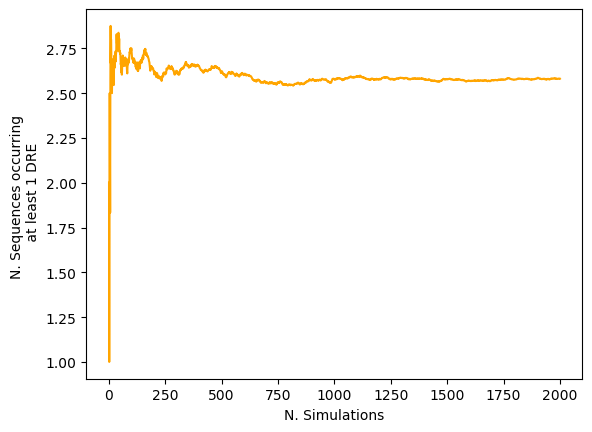

In [ ]:
%matplotlib inline
import pylab
numTrials = 2000
yAxis = vals
xAxis = range(1,numTrials+1)
pylab.xlabel('N. Simulations')
pylab.ylabel('N. Sequences occurring \n at least 1 DRE')
pylab.plot(xAxis, yAxis, color = "orange")
pylab.show()

In [ ]:
seq = vals[-1]
print("Summary : \n Number of actual promoters in the dataset showing the CRE : {} promoters".format(true))
print(" Theoretically (roughly) , the number of promoters showing at least 1 CRE : {} promoters".format(model1))
print(" Theoretically (accurate) , the number of promoters showing at least 1 CRE : {} promoters".format(seq))

Summary : 
 Number of actual promoters in the dataset showing the CRE : 4 promoters
 Theoretically (roughly) , the number of promoters showing at least 1 CRE : 2.0 promoters
 Theoretically (accurate) , the number of promoters showing at least 1 CRE : 2.58 promoters


&nbsp;

**Now we repeat the same programmatically for all CREs**

 `runSim` is modified to return only the last simulation value.
  
    * for graphical representation : runSim
    * for value in the table : runSim2

&nbsp;

In [ ]:
def runSim2(CRE,bp,nset,numTrials) :
    '''
    Run a MC simulation (numTrials).
    Return the number of expected promotores
    in a given data set (nset) containing at least 1 CRE in each
    trial (numTrials)

    CRE, cis-regulatory element
    bp, promoter length (1500)
    nset, number promoters in the data set
    numTrials, number of simulations
    '''

    vals= []
    total = 0
    for i in range(1,numTrials+1) :
        ## Keep track of the simulations
        if i%200==0 :
          print('Simulation',i)
        total += atLeastOneMotif(CRE, bp, nset)*nset
        vals.append(round(total/i,3))

    return vals[-1]

#### RUN SIMULATIONS

In [ ]:
import timeit
import random
start_time = timeit.default_timer()
vals2 = []
nset = len(genome)
for i in range(len(CREs.all)) :
    CRE = CREs.all[i]
    print('')
    print(' CRE:', CREs.get_list_name_by_index(index=i, list_of_lists=CREs.all))
    random.seed(25)
    vals2.append(runSim2(CRE, 1500, nset, 2000))

elapsed = timeit.default_timer() - start_time

CRE: WBOX
Simulacion 200
Simulacion 400
Simulacion 600
Simulacion 800
Simulacion 1000
Simulacion 1200
Simulacion 1400
Simulacion 1600
Simulacion 1800
Simulacion 2000
CRE: CBF
Simulacion 200
Simulacion 400
Simulacion 600
Simulacion 800
Simulacion 1000
Simulacion 1200
Simulacion 1400
Simulacion 1600
Simulacion 1800
Simulacion 2000
CRE: DRE
Simulacion 200
Simulacion 400
Simulacion 600
Simulacion 800
Simulacion 1000
Simulacion 1200
Simulacion 1400
Simulacion 1600
Simulacion 1800
Simulacion 2000
CRE: CAMTA
Simulacion 200
Simulacion 400
Simulacion 600
Simulacion 800
Simulacion 1000
Simulacion 1200
Simulacion 1400
Simulacion 1600
Simulacion 1800
Simulacion 2000
CRE: ABRE
Simulacion 200
Simulacion 400
Simulacion 600
Simulacion 800
Simulacion 1000
Simulacion 1200
Simulacion 1400
Simulacion 1600
Simulacion 1800
Simulacion 2000
CRE: AtBH5
Simulacion 200
Simulacion 400
Simulacion 600
Simulacion 800
Simulacion 1000
Simulacion 1200
Simulacion 1400
Simulacion 1600
Simulacion 1800
Simulacion 2000
CRE:

In [ ]:
elapsed # Get the elapsed time for the execution of the last chunk

17895.332599999998

In [ ]:
print('Hours:', (elapsed / 60) / 60)

Hours: 4.970925722222222


In [ ]:
len(vals2)

43

&nbsp;

To save a list to a file locally in Python, you can use the built-in `pickle`

In [ ]:
import pickle

# Save the list to a file
with open('vals2.pkl', 'wb') as f:
    pickle.dump(vals2, f)

In [ ]:
import os
os.listdir()

['CREs.py', 'mads_promoters.fasta', 'vals2.pkl']

To load the list from the file, you can use the following code:

In [ ]:
# Load the list from the file
with open('vals2.pkl', 'rb') as f:
    my_list = pickle.load(f)

print(my_list)

&nbsp;

Combine Observed & Expected data

In [ ]:
col1 = []
col2 = []
for t in CREs.all :
    CRE = t
    a,b = search(CRE,genome)
    occurr = 0
    for m in b:
        occurr +=len(m)
    col1.append(len(set(a)))
    col2.append(occurr)

In [ ]:
import pandas as pd

# Create the dataframe
data = {'Total_query': [len(genome)]*len(CREs.all),
        'Observed_promoters': col1,
        'Observed_occurr': col2,
        'Expected_promoters': vals2}
df = pd.DataFrame(data)

# Create a new column that is the ratio of x and y
df['Enrichment'] = round(df['Observed_promoters'] / df['Expected_promoters'],2)

# Export the dataframe to a CSV file
# df.to_csv('my_dataframe.csv', index=False)


In [ ]:
df

,Total_query,Observed_promoters,Observed_occurr,Expected_promoters,Enrichment
0,34,27,48,27.997,0.96
1,34,2,2,1.910,1.05
2,34,4,4,2.547,1.57
3,34,9,17,5.179,1.74
4,34,2,2,0.717,2.79
5,34,0,0,2.100,0.00
6,34,2,2,1.947,1.03
7,34,24,39,24.672,0.97
8,34,1,1,0.775,1.29
9,34,24,47,24.614,0.98


In [ ]:
# Filter the DataFrame to include only rows where 'B' > 20
df_filtered = df[df['Enrichment'] > 1.5]
df_filtered

,Total_query,Observed_promoters,Observed_occurr,Expected_promoters,Enrichment
2,34,4,4,2.547,1.57
3,34,9,17,5.179,1.74
4,34,2,2,0.717,2.79
31,34,3,3,1.925,1.56
34,34,8,9,4.941,1.62
35,34,8,8,5.303,1.51


&nbsp;

# Estimate the *P*-value for the outcome

#### Enriched CREs : name & motives :

In [ ]:
# Print the index of the DataFrame
print(df_filtered.index)

# Convert the index to a list
index_list = df_filtered.index.tolist()
print(index_list)

Int64Index([2, 3, 4, 31, 34, 35], dtype='int64')
[2, 3, 4, 31, 34, 35]


In [ ]:
for i in index_list :
    print(CREs.get_list_name_by_index(index=i, list_of_lists=CREs.all))

DRE
CAMTA
ABRE
DRE2COREZMRAB17
LTRECOREATCOR15
MYCATERD1


In [ ]:
for i in index_list:
    print(CREs.all[i])

['GCCGAC', 'ACCGAC']
['ACGCGC', 'ACGCGG', 'ACGCGT', 'CCGCGC', 'CCGCGG', 'CCGCGT', 'GCGCGC', 'GCGCGG', 'GCGCGT']
['ACGTGTC']
['ACCGAC']
['CCGAC']
['CATGTG']


&nbsp;

### Define functions

In [ ]:
def getTarget(CRE, bp, goal):

    ''' Get the number of promoter data set needed (goal) to find at least 1 CRE per promoter.

    bp = promoter length
    goal = number of promoters with at least 1 motif '''

    numSuccess = 0
    numTries = 0
    count = 0
    while numSuccess < goal :
        promotor = getPromoter(bp)
        numTries +=1

        for m in CRE :
            if m in promotor :
                count += 1
                if count >= goal :
                    numSuccess= numTries

    return numSuccess

In [ ]:
def runSim_P(CRE, bp, goal,numTrials):
    '''bp: promoter bases (1500)
    goal (float) : number of times looking for a specific motif
    numTrial : number of simulations (2000)'''
    #val = [] # To have the account of the accumulated value
    total = 0

    for i in range(1,numTrials+1):
        if i%200==0 :
            print('Sim.',i,'...',round(total/float(i),2))
        total += getTarget(CRE, bp, goal)
    #    val.append(total/float(i))


    #print val
    print('Average number of tries =', total/float(numTrials))
    print('P-value=',1/(total/float(numTrials)))
    print('')

In [ ]:
def runSim_Pplot(CRE, bp, goal,numTrials):
    '''bp: promoter bases (1500)
    goal (float) :number of times looking for a specific motif
    numTrial : number of simulations (2000)'''
    val = [] # Keep track of average number of tries to achieve the goal
    total = 0

    for i in range(1,numTrials+1):
        total += getTarget(CRE, bp, goal)
        val.append(total/float(i))

    return val

### Example

In [ ]:
df_filtered.iloc[:1, :]

,Total_query,Observed_promoters,Observed_occurr,Expected_promoters,Enrichment
2,34,4,4,2.547,1.57


In [ ]:
CREs.get_list_name_by_index(index=2, list_of_lists=CREs.all)

'DRE'

Example : how many times do we need to generate 1500bp promoters randomly to find 4 promoters ('observed_promoters') with at least 1 DRE (CREs.all[2]) ?

In [ ]:
random.seed(25)
goal = 4
getTarget(CREs.DRE,1500,goal)

52

&nbsp;

Instead of doing this step once, we run the function `getTarget` as many times as we want to simulate and we see how the result changes. (Example, DRE goes from 52 to 51.879)


`runSim_P` is just for looking on screen ; to work with data use `runSim_Pplot`. `runSimP` is used to calculate the P value.

In [ ]:
random.seed(25)
CRE = CREs.DRE
goal = 4
mc = 2000
runSim_P(CRE,1500,goal,mc)

Sim. 200 ... 54.59
Sim. 400 ... 52.97
Sim. 600 ... 53.15
Sim. 800 ... 53.11
Sim. 1000 ... 53.02
Sim. 1200 ... 52.99
Sim. 1400 ... 52.57
Sim. 1600 ... 52.05
Sim. 1800 ... 52.04
Sim. 2000 ... 51.87
Average number of tries = 51.879
P-value= 0.019275622120703946



With `runSim_Pplot`we create the graphical representation of the simulation for a specific CRE:

In [ ]:
random.seed(25)
CRE = CREs.DRE
goal = 4
mc = 2000
valsDRE = runSim_Pplot(CRE,1500,goal,mc)

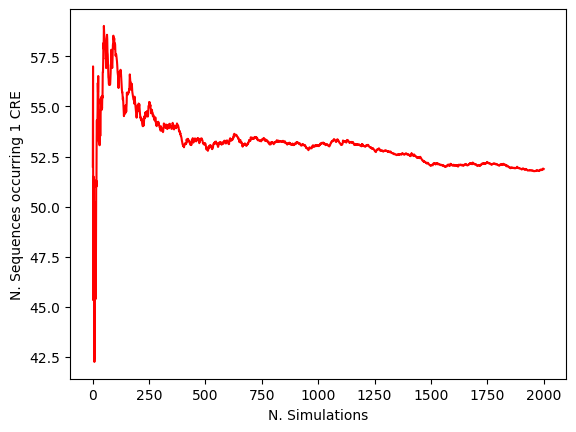

In [ ]:
%matplotlib inline
import pylab
numTrials = mc
yAxis = valsDRE
xAxis = range(1,numTrials+1)
pylab.xlabel('N. Simulations')
pylab.ylabel('N. Sequences occurring 1 CRE')
pylab.plot(xAxis, yAxis, color = "red")
pylab.show()

In [ ]:
valsDRE[-1]

51.879

&nbsp;

Now we do the same programmatically for all the candidate motives to be enriched. We need to call the function runSim_P() giving as an argument the number of motives found in the promoter set for each case.

In [ ]:
df_filtered

,Total_query,Observed_promoters,Observed_occurr,Expected_promoters,Enrichment
2,34,4,4,2.547,1.57
3,34,9,17,5.179,1.74
4,34,2,2,0.717,2.79
31,34,3,3,1.925,1.56
34,34,8,9,4.941,1.62
35,34,8,8,5.303,1.51


In [ ]:
import timeit
start_time = timeit.default_timer()

import random
random.seed(25)
mc = 2000
runSim_P(CREs.all[3], 1500, 9, mc)
runSim_P(CREs.all[4], 1500, 2, mc)
runSim_P(CREs.all[31],1500, 3, mc)
runSim_P(CREs.all[34],1500, 8, mc)
runSim_P(CREs.all[35],1500, 8, mc)

elapsed = timeit.default_timer() - start_time

Sim. 200 ... 52.73
Sim. 400 ... 52.3
Sim. 600 ... 53.45
Sim. 800 ... 53.88
Sim. 1000 ... 54.73
Sim. 1200 ... 54.95
Sim. 1400 ... 55.26
Sim. 1600 ... 54.98
Sim. 1800 ... 54.96
Sim. 2000 ... 54.86
Average number of tries = 54.893
P-value= 0.018217259031206166

Sim. 200 ... 98.22
Sim. 400 ... 95.22
Sim. 600 ... 93.89
Sim. 800 ... 92.72
Sim. 1000 ... 92.26
Sim. 1200 ... 92.6
Sim. 1400 ... 92.51
Sim. 1600 ... 92.58
Sim. 1800 ... 92.15
Sim. 2000 ... 92.6
Average number of tries = 92.6375
P-value= 0.010794764539198488

Sim. 200 ... 56.17
Sim. 400 ... 56.97
Sim. 600 ... 55.11
Sim. 800 ... 54.66
Sim. 1000 ... 54.09
Sim. 1200 ... 54.04
Sim. 1400 ... 53.87
Sim. 1600 ... 53.66
Sim. 1800 ... 53.87
Sim. 2000 ... 53.76
Average number of tries = 53.7795
P-value= 0.018594445839027883

Sim. 200 ... 53.76
Sim. 400 ... 54.3
Sim. 600 ... 54.9
Sim. 800 ... 54.39
Sim. 1000 ... 54.31
Sim. 1200 ... 54.74
Sim. 1400 ... 54.34
Sim. 1600 ... 54.19
Sim. 1800 ... 54.07
Sim. 2000 ... 54.13
Average number of tries = 5

In [ ]:
print('Minutes:', elapsed / 60)

Minutes: 59.74660333333334


In [ ]:
df_filtered

,Total_query,Observed_promoters,Observed_occurr,Expected_promoters,Enrichment
2,34,4,4,2.547,1.57
3,34,9,17,5.179,1.74
4,34,2,2,0.717,2.79
31,34,3,3,1.925,1.56
34,34,8,9,4.941,1.62
35,34,8,8,5.303,1.51


&nbsp;

If interested in a specific CRE, we can perform the graphical representation of the simulation:

In [ ]:
random.seed(25)
CRE = CREs.DRE
goal = 4
mc = 2000
vals4 = runSim_Pplot(CRE,1500,goal,mc)

# Extract sequences with enriched CRES

**Summary**  
 The enriched CREs are :

In [ ]:
for i in index_list :
    print(CREs.get_list_name_by_index(index=i, list_of_lists=CREs.all))

DRE
CAMTA
ABRE
DRE2COREZMRAB17
LTRECOREATCOR15
MYCATERD1


In [ ]:
over = [CREs.DRE, CREs.CAMTA, CREs.ABRE, CREs.DRE2COREZMRAB17, CREs.LTRECOREATCOR15, CREs.MYCATERD1 ]

In [ ]:
for i in range(len(over))  :
    CRE = over[i]
    a,b = search(CRE,genome)
    print('')
    print(CREs.get_list_name_by_index(index=i, list_of_lists=over))
    for n in list(set(a)):
        print(seq_names[n])


DRE
LOC101493118_promoter
LOC101510419_promoter
LOC101513562_promoter
LOC101500959_promoter

CAMTA
LOC101500250_promoter
LOC101509359_promoter
LOC101503680_promoter
LOC101504006_promoter
LOC101513013_promoter
LOC101510444_promoter
LOC101498947_promoter
LOC101508487_promoter
LOC101490010_promoter

ABRE
LOC101509049_promoter
LOC101514275_promoter

DRE2COREZMRAB17
LOC101510419_promoter
LOC101513562_promoter
LOC101500959_promoter

LTRECOREATCOR15
LOC101493118_promoter
LOC101510419_promoter
LOC101503022_promoter
LOC101504006_promoter
LOC101513562_promoter
LOC101500959_promoter
LOC101507855_promoter
LOC101490010_promoter

MYCATERD1
LOC101490232_promoter
LOC101493118_promoter
LOC101509049_promoter
LOC101509359_promoter
LOC101497019_promoter
LOC101488623_promoter
LOC101491267_promoter
LOC101508487_promoter


**Positions of CREs in the sequence**

In [ ]:
def distFromTSS(CRE, dataset) :
    '''Gives a list with the position of a relative motif to the Translation Start Site (TSS).
    Requires that the promoter contains the bases of the first three amino acid.'''

    a,b = search(CRE,dataset)
    lengths =[]
    dist = []
    for item in a :
        lengths.append(len(dataset[item]))

    for i in range(len(b)) :
        for item in b[i]:
            dist.append((lengths[i]-9-item)*-1)

    return dist


def distributionFromTSS(a,b,c, occ) :
    ''' Given a list with the relative positions to the Translation Start Site (TSS),
    sums the occurrences of specific CREs in established ranges.
    a, - bp upstream the TSS
    b, + bp downstream the TSS
    c, range length
    occ, list of occurrences for a given cis-regulatory element'''

    intervals = range(a,b,c)
    vals = []

    for interv in range(len(intervals)-1): #Loop over ranges
        count = 0
        for v in occ :                 #Loop over occurrences
            if intervals[interv] < v <= intervals[interv+1] :
                count +=1
        vals.append(round(count/float(len(occ)),2))           #Keep track of counts for that range

    return vals

Physical position in an interval : -1500, 0

In [ ]:
CRE = CREs.DRE
dataset = genome
distFromTSS(CRE, dataset)

[-1032, -1398, -1378, -982]

Relative position (%) in 100bp intervals : -1500, 0

In [ ]:
dre = distributionFromTSS(-1500,100,100, distFromTSS(CREs.DRE, genome))
dre

[0.0, 0.5, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
%matplotlib inline
import pylab
from pylab import *

ejeX = range(-1500,0,100)

plot(ejeX, dre, color = 'red', lw=0.5)
pylab.title('Distribution of CREs (DRE) in MADS box promoters \n Chickpea genome')
pylab.xlabel('Distance from start codon')
pylab.ylabel('Content Percentage (%)')
pylab.show()


NameError: ignored

In [ ]:
camta  = distributionFromTSS(-1500,100,100, distFromTSS(CREs.CAMTA, genome))
abre   = distributionFromTSS(-1500,100,100, distFromTSS(CREs.ABRE, genome))
dre2   = distributionFromTSS(-1500,100,100, distFromTSS(CREs.DRE2COREZMRAB17, genome))
ltre   = distributionFromTSS(-1500,100,100, distFromTSS(CREs.LTRECOREATCOR15, genome))
mycat1 = distributionFromTSS(-1500,100,100, distFromTSS(CREs.MYCATERD1, genome))

In [ ]:
all = array(dre) +  array(camta) + array(abre) + array(dre2) + array(ltre) + array(mycat1)

In [ ]:
# If the previous code does not work use this code :
#All = [sum(x) for x in zip(dre, camta, abre, dre2, ltre, mycat1)]

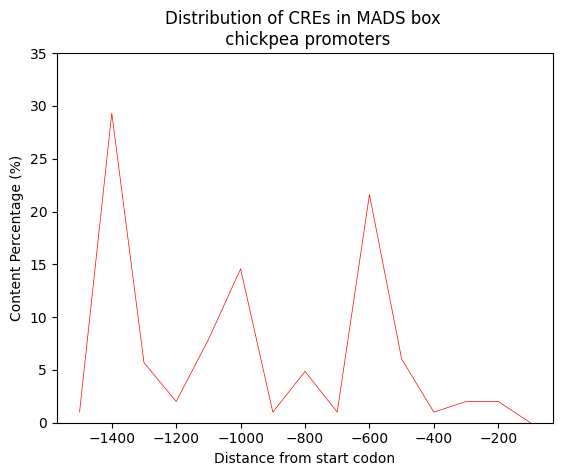

In [ ]:
plot(ejeX, all / sum(all) * 100, color = 'red', lw = 0.5)
pylab.title('Distribution of CREs in MADS box \n chickpea promoters')
pylab.xlabel('Distance from start codon')
pylab.ylabel('Content Percentage (%)')
pylab.ylim([0,35])
pylab.show()

We can check the result comparing it with a simulation of randomly generated promoters. In this case we would expect that each interval had the same chance of having a CRE and therefore we would find a uniform distribution.

In [ ]:
def estimatedOccurr(CRE, bp, numTrials):

    "Return list containing positions of a given CRE within a promoter"
    ''' numTrials, number of simulated promoters'''
    ''' bp, length of the promoter'''

    positions = []

    for i in range(numTrials) :
        promotor = getPromoter(bp)
        occurrences = []

        for m in CRE :
             occurrences.append(naive(m,promotor))
             for i in range(len(occurrences)) :
                 for pos in occurrences[i] :
                     positions.append((1500-pos-9)*-1)

    return positions

We will simulate 2000/3000 promoters (1500bp) for each CRE

In [ ]:
import random
random.seed(123)
sim = 3000

dre_synthetic    = distributionFromTSS(-1500,100,100, estimatedOccurr(CREs.DRE,1500,sim))
camta_synthetic  = distributionFromTSS(-1500,100,100, estimatedOccurr(CREs.CAMTA,1500,sim))
abre_synthetic   = distributionFromTSS(-1500,100,100, estimatedOccurr(CREs.ABRE,1500,sim))
dre2_synthetic   = distributionFromTSS(-1500,100,100, estimatedOccurr(CREs.DRE2COREZMRAB17,1500,sim))
ltre_synthetic   = distributionFromTSS(-1500,100,100, estimatedOccurr(CREs.LTRECOREATCOR15,1500,sim))
mycat1_synthetic = distributionFromTSS(-1500,100,100, estimatedOccurr(CREs.MYCATERD1,1500,sim))

In [ ]:
all_synthetic = array(dre_synthetic) +  array(camta_synthetic) + array(abre_synthetic) + array(dre2_synthetic) + \
array(ltre_synthetic) + array(mycat1_synthetic)

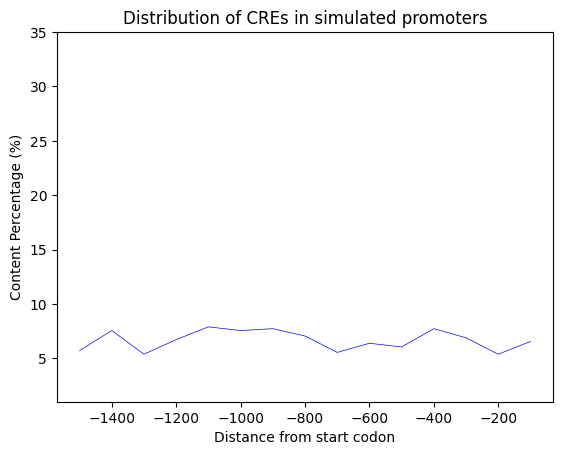

In [ ]:
%matplotlib inline
import pylab
from pylab import *
ejeX = range(-1500,0,100)
plot(ejeX, all_synthetic / sum(all_synthetic) * 100, color = 'blue', lw = 0.5)
pylab.title('Distribution of CREs in simulated promoters')
pylab.xlabel('Distance from start codon')
pylab.ylabel('Content Percentage (%)')
pylab.ylim([1,35])
pylab.show()

(If we have many enriched CREs, we can make the figure using only the three more enriched since \
the less enriched distort the result).

&nbsp;